In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
with open('response_list_null.pkl', 'rb') as f:
    response_list_null = pickle.load(f)

with open('response_list_gumbel.pkl', 'rb') as f:
    response_list_gumbel = pickle.load(f)

with open('response_list_inverse.pkl', 'rb') as f:
    response_list_inverse = pickle.load(f)

In [5]:
response_list_null[0]

{'prompt': '</s>After the martyrdom of St. Boniface, Vergilius was made Bishop of Salzburg (766 or 767) and laboured successfully for the upbuilding of his diocese as well as for the spread of the',
 'statistic': [{'pivot_statistic_gumbel_func': 1.0585432052612305,
   'inverse_pivot_statistic_func': 40422.66015625},
  {'pivot_statistic_gumbel_func': 1.1613823175430298,
   'inverse_pivot_statistic_func': 23434.224609375},
  {'pivot_statistic_gumbel_func': 0.08700218796730042,
   'inverse_pivot_statistic_func': 36774.0625},
  {'pivot_statistic_gumbel_func': 0.6825363636016846,
   'inverse_pivot_statistic_func': 11320.9638671875},
  {'pivot_statistic_gumbel_func': 0.3642619550228119,
   'inverse_pivot_statistic_func': 28854.94140625},
  {'pivot_statistic_gumbel_func': 0.10798028111457825,
   'inverse_pivot_statistic_func': 35103.390625},
  {'pivot_statistic_gumbel_func': 0.11618771404027939,
   'inverse_pivot_statistic_func': 34434.1953125},
  {'pivot_statistic_gumbel_func': 0.36611312627

In [7]:
# dataframe1: (generator, sample_index, input_prompt, total_output)
# dataframe2: (generator, sample_index, token_index, gumbel_pivot, inverse_pivot)

df1_rows = []
df2_rows = []

generator_mapper = {
    "unwatermarked": response_list_null,
    "gumbel_watermarked": response_list_gumbel,
    "inverse_watermarked": response_list_inverse,
}

for generator in generator_mapper:
    for sample_index in range(len(generator_mapper[generator])):
        
        # prompt texts
        df1_rows.append({
            "generator": generator,
            "sample_index": sample_index,
            "input_prompt": generator_mapper[generator][sample_index].get("prompt"),
            "total_output": generator_mapper[generator][sample_index].get("output"),
        })

        # watermarked texts
        for token_index in range(len(generator_mapper[generator][sample_index].get("statistic"))):
            df2_rows.append({
                "generator": generator,
                "sample_index": sample_index,
                "token_index": token_index,
                "gumbel_pivot": generator_mapper[generator][sample_index].get("statistic")[token_index].get("pivot_statistic_gumbel_func"),
                "inverse_pivot": generator_mapper[generator][sample_index].get("statistic")[token_index].get("inverse_pivot_statistic_func"),
            })


df1 = pd.DataFrame(df1_rows)
df2 = pd.DataFrame(df2_rows)

In [10]:
df1.to_csv("prompt_outputs.csv")
df2.to_csv("watermark_statistic.csv")

In [11]:
df2.head()

,generator,sample_index,token_index,gumbel_pivot,inverse_pivot
0,unwatermarked,0,0,1.058543,40422.660156
1,unwatermarked,0,1,1.161382,23434.224609
2,unwatermarked,0,2,0.087002,36774.062500
3,unwatermarked,0,3,0.682536,11320.963867
4,unwatermarked,0,4,0.364262,28854.941406


In [15]:
# let's consider average curve across all sample indices

agg_df = df2.groupby(['generator', 'token_index'], as_index=False)[['gumbel_pivot', 'inverse_pivot']].mean().sort_values(['generator', 'token_index'])
agg_df.head()

,generator,token_index,gumbel_pivot,inverse_pivot
0,gumbel_watermarked,0,3.844595,22177.178156
1,gumbel_watermarked,1,3.042450,23296.189346
2,gumbel_watermarked,2,3.839804,27230.256222
3,gumbel_watermarked,3,3.597553,26691.159738
4,gumbel_watermarked,4,5.622744,26882.123603


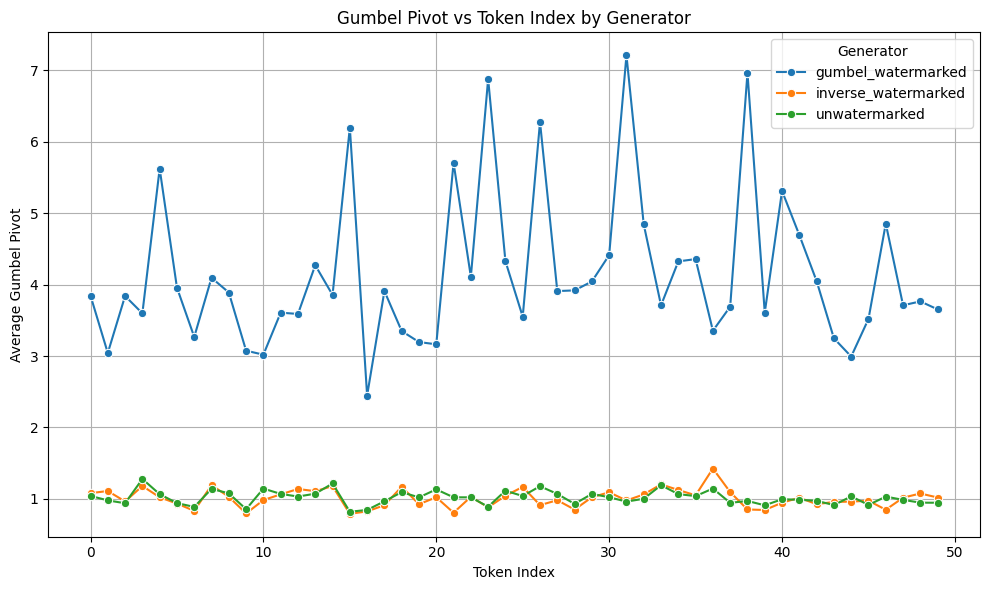

In [16]:
# plot the graph of gumbel_pivot (for different values of generator)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=agg_df,
    x='token_index',
    y='gumbel_pivot',
    hue='generator',
    marker='o'
)

plt.title('Gumbel Pivot vs Token Index by Generator')
plt.xlabel('Token Index')
plt.ylabel('Average Gumbel Pivot')
plt.legend(title='Generator')
plt.grid(True)
plt.tight_layout()
plt.show()

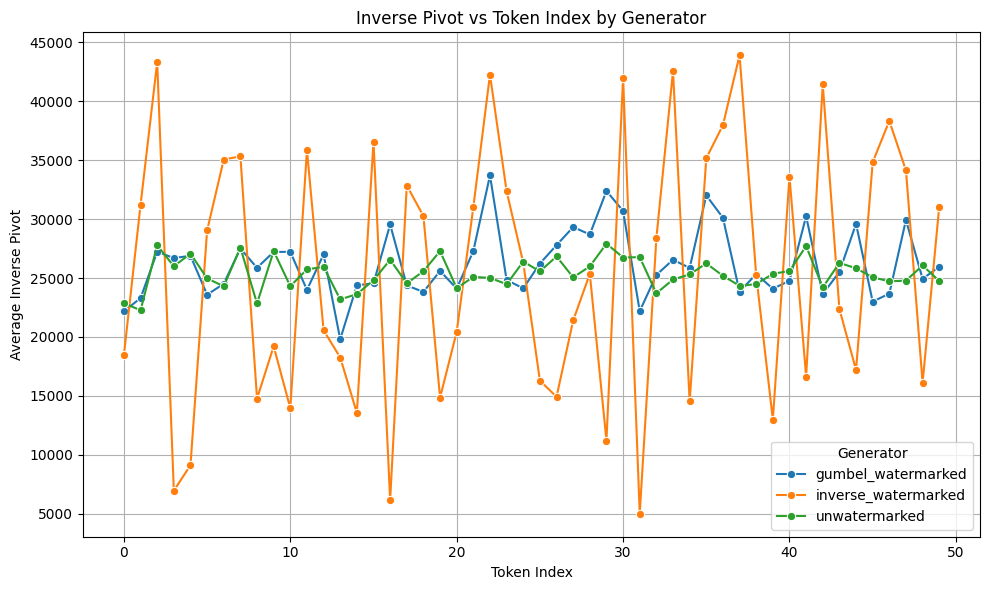

In [17]:
# plot the graph of inverse_pivot (for different values of generator)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=agg_df,
    x='token_index',
    y='inverse_pivot',
    hue='generator',
    marker='o'
)

plt.title('Inverse Pivot vs Token Index by Generator')
plt.xlabel('Token Index')
plt.ylabel('Average Inverse Pivot')
plt.legend(title='Generator')
plt.grid(True)
plt.tight_layout()
plt.show()

## Single Testing

In [3]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

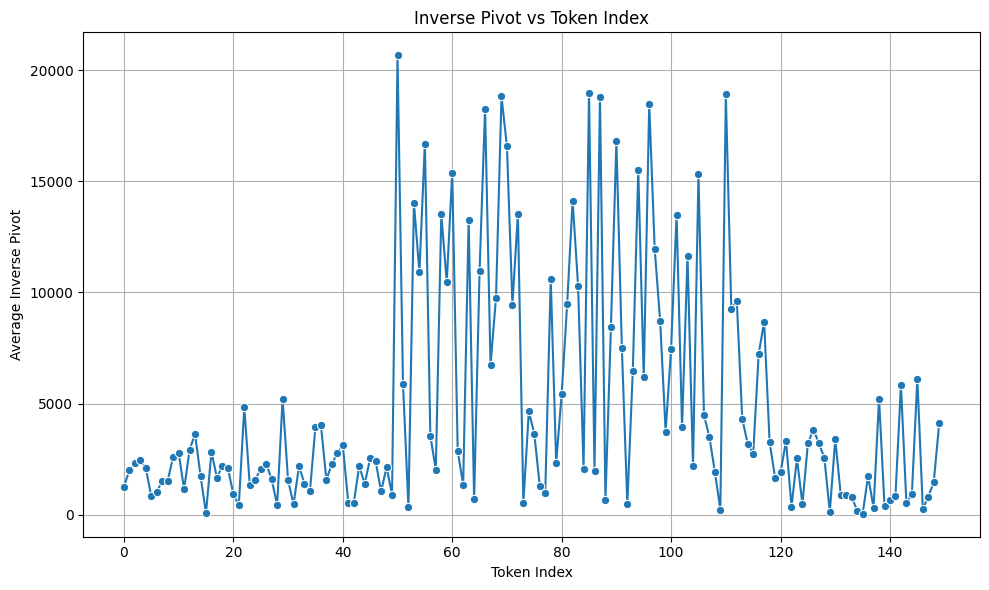

In [10]:
with open('./output/response_list_uwm_50_inverse_120_uwm.pkl', 'rb') as f:
    response_list = pickle.load(f)

df_rows = []
for sample_index in range(len(response_list)):
    for token_index in range(len(response_list[sample_index].get("statistic"))):
        df_rows.append({
            "sample_index": sample_index,
            "token_index": token_index,
            "gumbel_pivot": response_list[sample_index].get("statistic")[token_index].get("pivot_statistic_gumbel_func"),
            "inverse_pivot": response_list[sample_index].get("statistic")[token_index].get("inverse_pivot_statistic_func"),
        })

df = pd.DataFrame(df_rows)

# average curve
agg_df = df.groupby(['token_index'], as_index=False)[['gumbel_pivot', 'inverse_pivot']].mean().sort_values(['token_index'])
agg_df['inverse_pivot_diff'] = np.abs(agg_df['inverse_pivot'] - (50272 / 2))

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=agg_df,
    x='token_index',
    y='inverse_pivot_diff',
    marker='o'
)

plt.title('Inverse Pivot vs Token Index')
plt.xlabel('Token Index')
plt.ylabel('Average Inverse Pivot')
plt.grid(True)
plt.tight_layout()
plt.show()